# Final analysis

This notebook contains the final form of our analysis as well as the final form of the data cleaning process.

In [1]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
path = r'/home/daniel/code/costofcare/data/bhp_ukhls_data_stata/UKDA-6614-stata/stata/ukhls'
all_files = glob.glob(os.path.join(path , '*indresp.dta'))
raw_colnames = ['hidp',
                'sex',
                'jbnssec_dv',
                'jbnssec8_dv',
                'jbstat',
                'jbhrs',
                'ethn_dv',
                'dvage',
                'mastat_dv',
                'country',
                'aidhh',
                'aidhrs',
                'aidxhh',
                'paygu_dv',
                'qfhigh',
                'qfhigh_dv',
                'istrtdatm',
                'istrtdaty',
                'month']
indresp = []
prefixes = [] # for later
for filename in all_files:
    prefix = filename.split('/')[-1][0:2]
    prefixes.append(prefix)
    colnames = [f'{prefix}{x}' for x in raw_colnames]
    temp_df = pd.read_stata(filename,
                       columns=['pidp'] + colnames)
    indresp.append(temp_df)

In [2]:
for i, df in enumerate(indresp):
    df['wave'] = i+1
    df.columns = ['pidp',
                'hidp',
                'sex',
                'jbnssec_dv',
                  'jbnssec8_dv',
                'jbstat',
                'jbhrs',
                'ethn_dv',
                'dvage',
                'mastat_dv',
                'country',
                'aidhh',
                'aidhrs',
                'aidxhh',
                'paygu_dv',
                'qfhigh',
                'qfhigh_dv',
                'istrtdatm',
                'istrtdaty',
                'month',
                 'wave']

In [3]:
data = pd.concat(indresp)
data['max_waves'] = data.groupby('pidp')['wave'].transform('count')
len(data.pidp.unique())

88602

In [4]:
check = data[['wave', 'pidp', 'max_waves']]

In [5]:
len(check[check.max_waves > 5].pidp.unique())

40123

## Decision
We will consider that has at least six data points, whether or not they are consecutive or not, and whether or not they start from wave 1.

In [6]:
data_6 = data[data.max_waves > 5]
len(data_6.pidp.unique())

40123

# Treatment Variable

## Decision
Recoding treatment variable

In [7]:
import numpy as np
data_6['aidhh_recoded'] = data_6.aidhh.replace({'Yes': 'yes',
                                                'No': 'no',
                                                'no     ': 'no',
                                                'yes    ': 'yes',
                                                'Not available for IEMB': np.nan,
                                                "don't know": np.nan,
                                                'proxy': np.nan,
                                                'missing': np.nan,
                                                'refusal': np.nan,
                                                'inapplicable': np.nan})

/tmp/ipykernel_5464/1074845151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_6['aidhh_recoded'] = data_6.aidhh.replace({'Yes': 'yes',


In [8]:
data_6['aidxhh_recoded'] = data_6.aidxhh.replace({'Yes': 'yes',
                                                'No': 'no',
                                                'no     ': 'no',
                                                'yes    ': 'yes',
                                                'Not available for IEMB': np.nan,
                                                "don't know": np.nan,
                                                'proxy': np.nan,
                                                'missing': np.nan,
                                                'refusal': np.nan,
                                                'inapplicable': np.nan})

/tmp/ipykernel_5464/1333873410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_6['aidxhh_recoded'] = data_6.aidxhh.replace({'Yes': 'yes',


In [9]:
data_6['aidhrs_recoded_3'] = data_6.aidhrs.str.strip().replace({"inapplicable": np.nan,
                                   "0 - 4 hours per week": "0-19",
                                   "proxy": np.nan,
                                   "5 - 9 hours per week": "0-19",
                                   "10 - 19 hours per week": "0-19",
                                   "100 or more hours per week/continuous care": "50+",
                                   "20 - 34 hours per week": "20-49",
                                   "35 - 49 hours per week": "20-49",
                                   "varies 20 hours or more": "20-49",
                                   "0 - 4 hours per week": "0-19",
                                   "10-19 hours per week": "0-19",
                                   "Not available for IEMB": np.nan,
                                   "Varies 20 hours or more": "20-49",
                                   "varies under 20 hours": "0-19",
                                   "Varies under 20 hours": "0-19",
                                   "20-34 hours per week": "20-49",
                                   "5 - 9 hours per week": "0-19",
                                   "Other": np.nan,
                                   "10 - 19 hours per week": "0-19",
                                   "35-49 hours per week": "20-49",
                                   "100 or more hours per week/continuous care": "50+",
                                   "20 - 34 hours per week": "20-49",
                                   "50-99 hours per week": "50+",
                                   "other": np.nan,
                                   "don't know": np.nan,
                                   "35 - 49 hours per week": "20-49",
                                   "varies under 20 hours": "0-19",
                                   "50 - 99 hours per week": "50+",
                                   "other": np.nan,
                                   "refusal": np.nan}).copy()

/tmp/ipykernel_5464/2909938044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_6['aidhrs_recoded_3'] = data_6.aidhrs.str.strip().replace({"inapplicable": np.nan,


## Note
The variable below identifies the people who provided care under our specific conditions based on the 3 variables above.

In [10]:
data_6['carer'] = ((data_6.aidhh_recoded == 'yes') | (data_6.aidxhh_recoded == 'yes') | (~data_6.aidhrs_recoded_3.isnull()))

/tmp/ipykernel_5464/3799348870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_6['carer'] = ((data_6.aidhh_recoded == 'yes') | (data_6.aidxhh_recoded == 'yes') | (~data_6.aidhrs_recoded_3.isnull()))


Counting how many waves are carers taking care responsabilities on average

In [11]:
care_resp = data_6[['pidp', 'carer', 'wave']][data_6.carer]
care_resp['max_waves'] = care_resp.groupby('pidp')['wave'].transform('count')
care_resp.drop_duplicates(subset=['pidp']).max_waves.mean()

3.6293369616411115

## Decision
We will use a "generalised" moment of treatment with at least 3 measures before, and at least 1 after.

# Target Variable

In [12]:
data_6['jbstat_clean'] = data_6.jbstat.str.strip().str.lower() # cleaning values here

/tmp/ipykernel_5464/2089346174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_6['jbstat_clean'] = data_6.jbstat.str.strip().str.lower() # cleaning values here


In [13]:
data_6.jbstat_clean.value_counts()

paid employment(ft/pt)                     187734
retired                                     99318
self employed                               31006
family care or home                         19859
unemployed                                  16201
full-time student                           15962
lt sick or disabled                         13788
on maternity leave                           2151
doing something else                         1981
on furlough                                   387
on apprenticeship                             288
unpaid, family business                       261
govt training scheme                          232
refusal                                       131
temporarily laid off/short term working        63
don't know                                     47
missing                                        29
Name: jbstat_clean, dtype: int64

In [14]:
data_6['employed'] = data_6.jbstat_clean.replace({"paid employment(ft/pt)": "employed",
                             "retired": "unemployed",
                       "self employed": "employed",
                       "family care or home": "unemployed",
                       "unemployed": "unemployed",
                       "full-time student": "unemployed",
                       "lt sick or disabled": "unemployed",
                       "on maternity leave": "employed",
                       "doing something else": "unemployed",
                       "on furlough": "unemployed",
                       "on apprenticeship": "employed",
                       "unpaid, family business": "unemployed",
                       "govt training scheme": "employed",
                       "refusal": np.nan,
                       "temporarily laid off/short term working": "unemployed",
                       "don't know": np.nan,
                       "missing": np.nan}
                     )

/tmp/ipykernel_5464/2757714622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_6['employed'] = data_6.jbstat_clean.replace({"paid employment(ft/pt)": "employed",


Total Sample size

In [15]:
data_6[['pidp', 'carer']].drop_duplicates(subset=['pidp'])

,pidp,carer
1,68004087,False
2,68006127,False
4,68006807,False
11,68008847,False
12,68009527,False
...,...,...
41859,1636671692,True
41873,1638419292,True
41930,1644675490,False
41931,1644675530,False


Total number of carers in sample

In [16]:
data_6[['pidp', 'carer']].drop_duplicates(subset=['pidp'])['carer'].sum()

6529

Number of employed individuals in the sample

In [17]:
len(data_6[(data_6.employed == 'employed')].drop_duplicates(subset=['pidp']))

29337

Number of employed carers

In [18]:
data_6[(data_6.employed == 'employed')].drop_duplicates(subset=['pidp']).carer.sum()

4340

## Decision
We are considering only employed individuals

In [19]:
df_6_emp = data_6[(data_6.employed == 'employed')]

Cleaning wage variable

In [20]:
df_6_emp['wage'] = df_6_emp.paygu_dv.replace({'inapplicable': np.nan, 'proxy': np.nan, 'missing': np.nan})

/tmp/ipykernel_5464/3065558054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6_emp['wage'] = df_6_emp.paygu_dv.replace({'inapplicable': np.nan, 'proxy': np.nan, 'missing': np.nan})


In [21]:
df_6_emp.wage

1        1075.000000
11       1282.170044
12       4116.669922
14       2333.330078
16       2641.449951
            ...     
29258    4583.330078
29259    7000.000000
29260    1624.750000
29263    2800.000000
29267            NaN
Name: wage, Length: 221411, dtype: float64

Adding cpih to correct for inflation

In [22]:
cpih = pd.read_csv('./cpih_uk_88_23.csv')
cpih['date'] = pd.to_datetime(cpih.date, format='%b-%y')
cpih

,date,cpih
0,1988-01-01,46.9
1,1988-02-01,47.0
2,1988-03-01,47.2
3,1988-04-01,47.8
4,1988-05-01,48.0
...,...,...
416,2022-09-01,122.3
417,2022-10-01,124.3
418,2022-11-01,124.8
419,2022-12-01,125.3


In [23]:
df_6_emp['istrtdaty'] = df_6_emp['istrtdaty'].astype('str').replace({'inapplicable': np.nan, 'missing': np.nan, "don't know": np.nan})
df_6_emp['istrtdatm'] = df_6_emp['istrtdatm'].replace({'inapplicable': np.nan, 'missing': np.nan, "don't know": np.nan})
df_6_emp['date'] = df_6_emp['istrtdaty'].astype(str) + '/' + df_6_emp['istrtdatm'].astype(str)
df_6_emp['date'] = df_6_emp['date'].replace({'nan/nan': np.nan})
df_6_emp['date'] = pd.to_datetime(df_6_emp['date'], format='%Y/%B')
df_6_emp = df_6_emp.merge(cpih, on='date', how='left')

/tmp/ipykernel_5464/1591602359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6_emp['istrtdaty'] = df_6_emp['istrtdaty'].astype('str').replace({'inapplicable': np.nan, 'missing': np.nan, "don't know": np.nan})
/tmp/ipykernel_5464/1591602359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6_emp['istrtdatm'] = df_6_emp['istrtdatm'].replace({'inapplicable': np.nan, 'missing': np.nan, "don't know": np.nan})
/tmp/ipykernel_5464/1591602359.py:3: SettingWithCopyWarning: 
A value is trying to be set 

In [24]:
df_6_emp['jbhrs_clean'] = df_6_emp.jbhrs.replace({'inapplicable': np.nan, 'proxy': np.nan, 'missing': np.nan, "don't know": np.nan, "refusal": np.nan, 0: np.nan})
df_6_emp['jbhrs_clean'][df_6_emp.jbhrs_clean < 1] = np.nan

/tmp/ipykernel_5464/295635728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6_emp['jbhrs_clean'][df_6_emp.jbhrs_clean < 1] = np.nan


In [25]:
df_6_emp['month_jbhrs'] = df_6_emp['jbhrs_clean'] * 4.33 # times the average amount of weeks

In [26]:
df_6_emp['wage_h'] = df_6_emp['wage'] / df_6_emp['month_jbhrs']

### Real wage calculation

In [27]:
df_6_emp['wage_h_deflated'] = (df_6_emp['wage_h'] / df_6_emp['cpih']) * 100

In [28]:
df_6_emp['wage_deflated'] = (df_6_emp['wage'] / df_6_emp['cpih']) * 100

# ISC Data preparation

In [29]:
isc_data = df_6_emp[['pidp', 'carer', 'wage_deflated', 'wage_h_deflated', 'wave', 'date']]

In [30]:
isc_data

,pidp,carer,wage_deflated,wage_h_deflated,wave,date
0,68004087,False,1241.339492,7.350859,1,2009-01-01
1,68008847,False,1480.565871,8.767489,1,2009-01-01
2,68009527,False,4753.660418,29.671434,1,2009-01-01
3,68010887,False,2694.376534,16.817780,1,2009-01-01
4,68011567,False,3050.173154,19.038594,1,2009-01-01
...,...,...,...,...,...,...
221406,1652366050,False,3971.689842,24.790524,12,2022-02-01
221407,1652814850,True,6134.969325,35.421301,12,2021-11-01
221408,1652835250,False,1423.970202,8.888148,12,2021-11-01
221409,1652984930,False,2441.533981,15.036391,12,2021-12-01


### Average number of waves caring

In [31]:
carer_events = []
for i in isc_data.pidp.unique():
    by_pidp = isc_data[isc_data.pidp == i]
    if by_pidp.carer.any():
        carer_events.append(by_pidp.carer.sum())
np.mean(carer_events)

3.041845399632321

## Decision
We will take the average as lower limit to determine treated cases. Everyone with less than 3 and more than 1 reported waves of caring will be dropped.

In [32]:
isc_data['waves_caring'] = isc_data.groupby('pidp')['carer'].transform('sum')
isc_data = isc_data[~((isc_data.waves_caring >= 1) & (isc_data.waves_caring < 3))]

/tmp/ipykernel_5464/2949276746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isc_data['waves_caring'] = isc_data.groupby('pidp')['carer'].transform('sum')


In [33]:
isc_data['wave_reindex'] = isc_data.sort_values(by=['pidp', 'wave']).groupby('pidp').cumcount() + 1
isc_data.reset_index(drop=True, inplace=True)
isc_data.sort_values(by=['pidp', 'wave_reindex'], inplace=True)

/tmp/ipykernel_5464/2134365079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isc_data['wave_reindex'] = isc_data.sort_values(by=['pidp', 'wave']).groupby('pidp').cumcount() + 1
/tmp/ipykernel_5464/2134365079.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isc_data.sort_values(by=['pidp', 'wave_reindex'], inplace=True)


In [34]:
isc_data['wave_treat'] = isc_data.wave_reindex[isc_data.groupby('pidp')['carer'].transform('idxmax').values].values

/tmp/ipykernel_5464/3447444823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isc_data['wave_treat'] = isc_data.wave_reindex[isc_data.groupby('pidp')['carer'].transform('idxmax').values].values


In [35]:
isc_data['wave_treat_real'] = isc_data.wave[isc_data.groupby('pidp')['carer'].transform('idxmax').values].values

/tmp/ipykernel_5464/2101417188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isc_data['wave_treat_real'] = isc_data.wave[isc_data.groupby('pidp')['carer'].transform('idxmax').values].values


In [36]:
isc_data['initial_wave'] = isc_data.groupby('pidp')['wave'].transform('min').values

/tmp/ipykernel_5464/2650344565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isc_data['initial_wave'] = isc_data.groupby('pidp')['wave'].transform('min').values


## Decision
Only carer with at least 5 data points before treatment are consider.

In [37]:
isc_data = isc_data.drop(isc_data[(isc_data.wave_treat < 6) & (isc_data.carer == True)].index)

In [38]:
def create_index(x):
    y = np.arange(len(x)) + 1
    return y - x

def create_relative_index(lst, point):
    index = lst.index(point)
    return [i - index for i in range(len(lst))]


In [39]:
isc_data['reindex'] = isc_data.groupby('pidp')['wave_treat'].transform(create_index)

In [40]:
isc_data

,pidp,carer,wage_deflated,wage_h_deflated,wave,date,waves_caring,wave_reindex,wave_treat,wave_treat_real,initial_wave,reindex
73823,29925,False,NaN,NaN,6,2014-09-01,0,1,1,6,6,0
90329,29925,False,NaN,NaN,7,2015-08-01,0,2,1,6,6,1
106529,29925,False,1354.679803,14.220867,8,2016-09-01,0,3,1,6,6,2
121932,29925,False,1346.153846,12.953751,9,2017-08-01,0,4,1,6,6,3
136258,29925,False,1573.182247,15.796588,10,2018-07-01,0,5,1,6,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...
106528,1653277250,False,982.318271,11.343167,7,2016-11-01,0,2,1,6,6,1
121931,1653277250,False,NaN,NaN,8,2018-01-01,0,3,1,6,6,2
136257,1653277250,False,655.430712,7.568484,9,2019-02-01,0,4,1,6,6,3
149834,1653277250,False,NaN,NaN,10,2019-10-01,0,5,1,6,6,4


In [41]:
isc_data = isc_data.dropna()

In [42]:
isc_data['ever_carer'] = isc_data.groupby('pidp')['carer'].transform(any)

/tmp/ipykernel_5464/4197461544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isc_data['ever_carer'] = isc_data.groupby('pidp')['carer'].transform(any)


In [43]:
carers = isc_data[isc_data.ever_carer]

In [44]:
controls = isc_data[~isc_data.ever_carer]

In [45]:
len(carers.pidp.unique())

399

In [46]:
def get_control_clean(c_data, t_data):
    samples = []
    t_ids = t_data.pidp.unique().tolist()
    for t_id in t_ids:
        out = {}
        init = t_data[t_data.pidp == t_id].initial_wave.unique()[0]
        treat_time = t_data[t_data.pidp == t_id].wave_treat_real.unique()[0]
        last_wave = t_data[t_data.pidp == t_id].wave.max()
        length = (last_wave + 1) - init
        idx = c_data[(c_data.wave >= init) & (controls.wave <= last_wave)].groupby('pidp')['pidp'].transform('count') == length
        sub_sample = c_data[(c_data.wave >= init) & (controls.wave <= last_wave)][idx].reset_index(drop=True)
        treat = t_data[t_data.pidp == t_id].pivot(index='wave', columns='pidp', values='wage_deflated')
        #treat.columns = ['treated']
        sub_sample = sub_sample.pivot(index='wave', columns='pidp', values='wage_deflated')
        sub_sample = pd.concat([treat, sub_sample], axis=1)
        out['data'] = sub_sample.fillna(0) # dirty fix, I need to adress this
        out['treat_time'] = treat_time
        samples.append(out)
    return samples

In [47]:
samples = get_control_clean(controls, carers)

In [48]:
from typing import List
from operator import add
from toolz import reduce, partial
import numpy as np
from scipy.optimize import minimize
from sklearn.neighbors import KDTree


# the expression to minimise, since \mu is 0, we are one looking for \omega/W
def argmin_w(W, Y_i, Y_0):
    return np.sqrt(np.sum((Y_0 - Y_i.dot(W))**2))


# a function wrapping the whole process
def get_w(Y_i, Y_0):
    w_start = [1/Y_i.shape[1]]*Y_i.shape[1]
    weights = minimize(partial(argmin_w, Y_i=Y_i, Y_0=Y_0),
                       np.array(w_start),
                       method='SLSQP',
                       constraints=({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}), # constraint to sum to 1
                       bounds=[(0.0, 1.0)]*len(w_start),
                       )
    return weights.x


def isc(data_objects: list) -> dict:
    synths = []
    treats = []
    diffs = []
    std_diffs = []
    for ele in data_objects:
        data = ele['data'].copy()
        t_time = ele['treat_time']
        data.sort_index(inplace=True)
        data.index = create_relative_index(data.index.tolist(), t_time)
        df_T0 = data.loc[:-1, :] # this needs to be revised
        Y_0 = df_T0.iloc[:, 0].values
        kdt = KDTree(df_T0.T, leaf_size=30, metric='euclidean')
        idx = kdt.query(df_T0.T, k=100, return_distance=False)[0, 1:]
        Y_i = df_T0.iloc[:, idx].values
        weights = get_w(Y_i, Y_0)
        synth = data.iloc[:, idx].dot(weights) # synthetic control is now based on the new subset of observations
        treated = data.iloc[:, 0]
        #synth.plot()
        #treated.plot()
        diff = treated - synth
        diff.plot()
        std_diff = (diff - diff.mean())/ diff.std()
        #std_diff.plot()
        #std_diff_b = 
        synths.append(synth)
        treats.append(treated)
        diffs.append(diff)
        std_diffs.append(std_diff)
    return {'synths': synths, 'treats': treats, 'diffs': diffs, 'std_diffs': std_diffs}


In [ ]:
isc_list = isc(samples)

In [ ]:
differences = pd.concat(isc_list['diffs'], axis=1).sort_index()
differences.loc[-5:].mean(axis=1).plot()

In [ ]:
differences

In [ ]:
Q1 = differences.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x7f77817ffa60>
Traceback (most recent call last):
  File "/home/daniel/code/costofcare/lib64/python3.11/site-packages/matplotlib/transforms.py", line 209, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id(self): pop(k))

KeyboardInterrupt: 


array([[<Axes: title={'center': '-9'}>, <Axes: title={'center': '-8'}>,
        <Axes: title={'center': '-7'}>],
       [<Axes: title={'center': '-6'}>, <Axes: title={'center': '-5'}>,
        <Axes: title={'center': '-4'}>],
       [<Axes: title={'center': '-3'}>, <Axes: title={'center': '-2'}>,
        <Axes: title={'center': '-1'}>],
       [<Axes: title={'center': '0'}>, <Axes: >, <Axes: >]], dtype=object)

Error in callback <function _draw_all_if_interactive at 0x7f77ee67ee80> (for post_execute):


KeyboardInterrupt: 

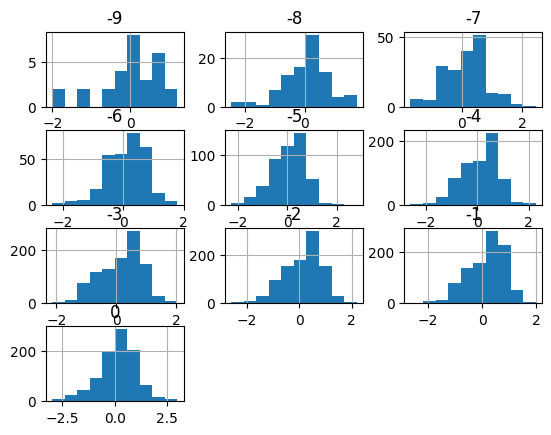

-9    1.023608
-8    1.252387
-7    1.279620
-6    1.017736
-5    1.042684
-4    1.044814
-3    1.141811
-2    1.129011
-1    1.069057
 0    1.601425
 1    1.620798
 2    1.516084
 3    1.667785
 4    1.605300
 5    1.722875
 6    1.693825
 7    1.669768
 8    1.906451
Name: 0.95, dtype: float64